# TP - Autour de l'estimateur Lasso

### *Alexandre TRENDEL, Nicolas HUBERT*

## Régression ridge, lasso et elastic-net sur les données Baseball Hitters

In [1]:
library(ISLR)
library(glmnet)
library(ggplot2)
library(caret)

Hitters = na.omit(Hitters)
head(Hitters)

n = nrow(Hitters)
Itrain = sample(1:n, n/2)
Hitters.train = Hitters[Itrain,]
Hitters.test = Hitters[-Itrain,]

Warning message:
"package 'glmnet' was built under R version 3.5.2"Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: lattice


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


## Question 1
*Effectuer la régression linéaire du Salaire sur toutes les autres variables pour les données de l’échantillon d’apprentissage.*

In [2]:
Hitters.lm = lm(Salary ~ ., Hitters.train)
summary(Hitters.lm)


Call:
lm(formula = Salary ~ ., data = Hitters.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-627.08 -144.93  -33.07   91.34 1800.03 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  174.43026  123.88768   1.408  0.16193   
AtBat         -1.33079    1.01031  -1.317  0.19048   
Hits           7.78044    3.39790   2.290  0.02392 * 
HmRun         13.69994    8.20655   1.669  0.09786 . 
Runs          -6.06970    3.88173  -1.564  0.12074   
RBI           -5.32402    3.39071  -1.570  0.11922   
Walks          7.02328    2.48443   2.827  0.00558 **
Years         -0.37717   16.85791  -0.022  0.98219   
CAtBat        -0.07551    0.20623  -0.366  0.71497   
CHits         -0.53185    0.98653  -0.539  0.59089   
CHmRun        -2.86733    2.26172  -1.268  0.20753   
CRuns          1.78621    1.04274   1.713  0.08951 . 
CRBI           1.89689    0.94171   2.014  0.04640 * 
CWalks        -1.25646    0.45885  -2.738  0.00720 **
LeagueN       99.70464  107

## Question 2
*Est-il cependant nécessaire de normaliser “à la main” les données avant d’utiliser glmnet() ? Consulter l’aide de la fonction pour répondre à cette question.*

Non, il n'est pas nécessaire de faire cette étape à la main : il est possible de demander à `glmnet` de faire celle-ci pour nous, à l'aide du paramètre `standardize`. Celui vaut `TRUE` par défaut, il n'y a donc rien à faire.

## Question 3
*Ajuster un estimateur ridge sur l’échantillon d’apprentissage.*

In [3]:
MatDesign = model.matrix(Salary ~ ., data = Hitters.train)
MatDesign = MatDesign[,-1]
head(MatDesign)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Robby Thompson,549,149,7,73,47,42,1,549,149,7,73,47,42,1,1,255,450,17,1
-Mike Young,369,93,9,43,42,49,5,1258,323,54,181,177,157,0,0,149,1,6,0
-Tom Paciorek,213,61,4,17,22,3,17,4061,1145,83,488,491,244,0,1,178,45,4,0
-Brett Butler,587,163,4,92,51,70,6,2695,747,17,442,198,317,0,0,434,9,3,0
-Jose Canseco,600,144,33,85,117,65,2,696,173,38,101,130,69,0,1,319,4,14,0
-Greg Gagne,472,118,12,63,54,30,4,793,187,14,102,80,50,0,1,228,377,26,0


In [9]:
Hitters.ridge = glmnet(MatDesign, Hitters.train$Salary, alpha = 0, lambda = c(1), intercept = F)
summary(Hitters.ridge)
Hitters.ridge$beta

          Length Class     Mode   
a0         1     -none-    numeric
beta      19     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       6     -none-    call   
nobs       1     -none-    numeric

19 x 1 sparse Matrix of class "dgCMatrix"
                     s0
AtBat       -0.74363631
Hits         6.02361254
HmRun       10.23159202
Runs        -4.72408103
RBI         -4.13345900
Walks        6.56439387
Years       11.11209739
CAtBat      -0.12481378
CHits        0.05879312
CHmRun      -1.20744566
CRuns        0.97510567
CRBI         1.15190768
CWalks      -0.97328440
LeagueN    121.38889388
DivisionW  -98.13909158
PutOuts      0.10894057
Assists      0.58066018
Errors      -7.33533176
NewLeagueN -17.28366763

## Question 4
*Donner la prédiction de cet estimateur ridge sur les 10 premiers joueurs.*

In [17]:
testMatrix = model.matrix(Salary ~ ., Hitters.test)[1:10,-1]
prediction = predict(Hitters.ridge, testMatrix, s = c(1))
actual = Hitters.test[1:10,]$Salary # pour comparer les prédictions aux vraies valeurs observées
data.frame(pred = prediction[,1], actual = actual)

,pred,actual
-Alvin Davis,493.4755,480.000
-Andres Galarraga,444.3589,91.500
-Alfredo Griffin,582.6959,750.000
-Al Newman,256.7656,70.000
-Andre Thornton,566.6304,1100.000
-Alan Wiggins,265.8114,700.000
-Buddy Bell,1125.1567,775.000
-Bobby Bonilla,265.4641,115.000
-Bob Brenly,595.7197,600.000
-Bob Dernier,349.4922,708.333


La qualité des prédictions est très hétérogène selon les joueurs : on remarque notamment que, par exemple, la prédiction du salaire de Alvin Davis ou de Bob Brenly s'avère très précise. On ne peut pas en dire autant pour Andres Galarraga ou encore Al Newman.

## Question 5
*Toujours pour l’estimateur ridge, choisissez λ par validation croisée 5 folds à l’aide de la fonction cv.glmnet(). On utilise ici uniquement les données d’apprentissage pour la validation croisée et on considère ici comme critère l’erreur moyenne quadratique MSE (mean square error) ou RMSE (root mean square error). Afficher (print) et représenter graphiquement (plot) les erreurs MSE pour la grille de λ considérée. Afficher aussi le vecteur des λ calculés ainsi que le nombre de coefficients non nuls (nzero) qui correspond à chaque λ. L’estimateur ridge est-il capable de sélectionner des variables ?*

           Length Class  Mode     
lambda     39     -none- numeric  
cvm        39     -none- numeric  
cvsd       39     -none- numeric  
cvup       39     -none- numeric  
cvlo       39     -none- numeric  
nzero      39     -none- numeric  
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

 [1] 371165.0 367088.2 364500.1 363745.6 362921.3 362021.3 361039.1 359967.8
 [9] 358799.9 357527.5 356142.4 354635.5 352997.7 351219.1 349289.5 347198.3
[17] 344934.7 342487.6 339845.8 336997.9 333933.0 330640.2 327109.4 323331.1
[25] 319296.9 314999.7 310434.1 305596.6 300486.3 295104.5 289455.9 283548.4
[33] 277393.5 271006.6 264406.9 257617.8 250666.3 243583.3 236403.1


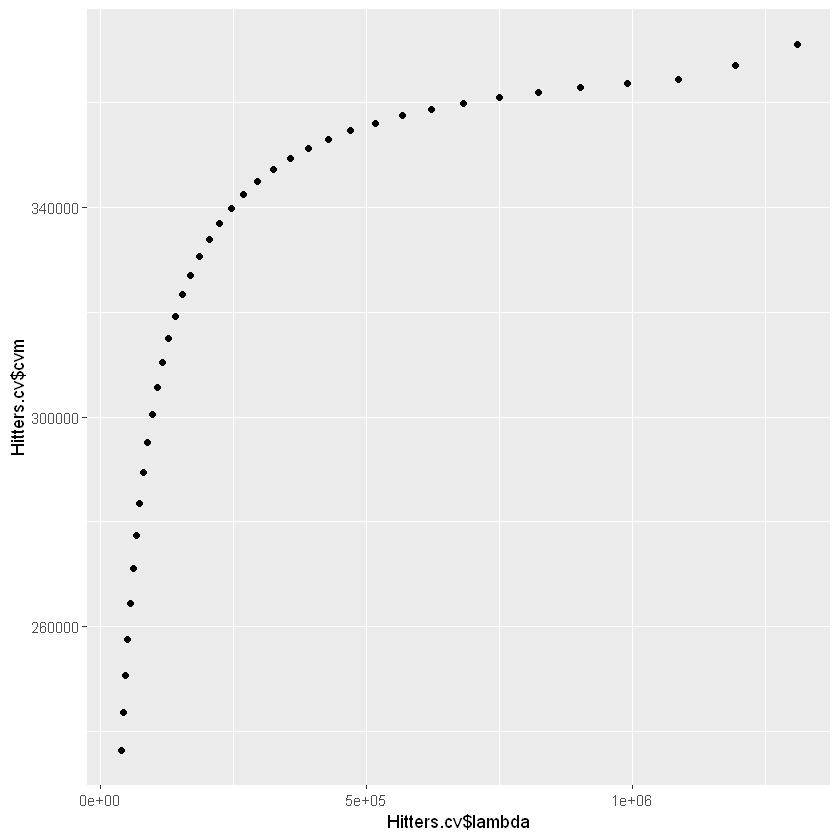

In [23]:
control = trainControl(method = "repeatedcv", number = 5, repeats = 1)

Hitters.cv = cv.glmnet(MatDesign, Hitters.train$Salary, nfolds = 5, alpha = 0, type.measure = "mse", intercept = F)
summary(Hitters.cv)

print(Hitters.cv$cvm) # cvm : The mean cross-validated error / erreur moyenne de validation croisée
ggplot(mapping = aes(x = Hitters.cv$lambda)) + geom_point(aes(y = Hitters.cv$cvm))

In [27]:
print(Hitters.cv$nzero)

 s0  s1  s2  s3  s4  s5  s6  s7  s8  s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 
 19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19 
s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31 s32 s33 s34 s35 s36 s37 s38 
 19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19 


L'estimateur ridge n'est pas capable de sélectionner des variables. On remarque effectivement que tout au long des itérations ci-dessus, le nombre de variables gardées dans le modèle reste constant et égal à 19. Pour information, la régression ridge nous permet de réduire l'amplitude des coefficients d'une régression linéaire et d'éviter le sur-apprentissage. Cependant, on peut souhaiter pousser les choses plus loin, et annuler certains coefficients. Pour cela, l'estimateur ridge n'est pas approprié; il faudra plutôt se tourner vers le Lasso qui, lui, peut annuler certains coefficients et nous proposer un modèle plus "allégé".

## Question 6
*Donner les coefficients de l’estimateur ridge pour la valeur du λ minimisant l’erreur MSE.*

In [28]:
index = which(Hitters.cv$lambda == Hitters.cv$lambda.min) # lambda.min : valeur de lambda donnant le cvm minimal.
beta = Hitters.cv$glmnet.fit$beta[,index]
beta

AtBat        Hits       HmRun        Runs         RBI       Walks 
0.058686315 0.184417832 0.624923607 0.288602396 0.290940502 0.336996466 
      Years      CAtBat       CHits      CHmRun       CRuns        CRBI 
1.133346487 0.002049398 0.007025706 0.048249726 0.013588207 0.014135597 
     CWalks     LeagueN   DivisionW     PutOuts     Assists      Errors 
0.015036323 6.501518527 5.655919930 0.015631209 0.019754384 0.621949295 
 NewLeagueN 
6.295575797

## Question 7
*Représenter les trajectoires des coefficients estimés en fonction de λ.*

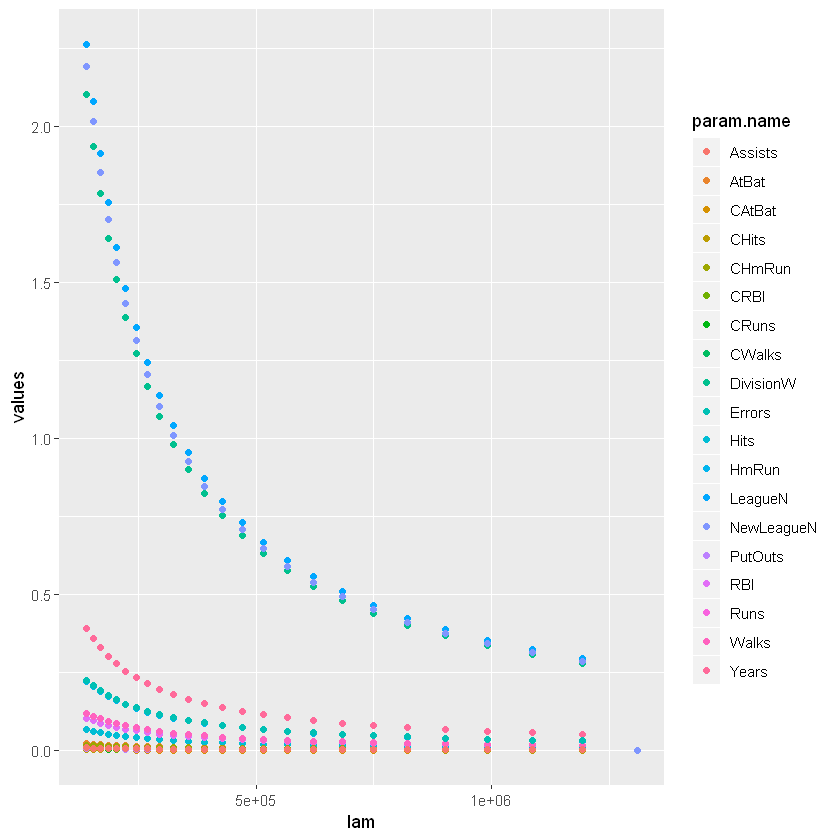

In [29]:
plot.trajectoire = function(res, names, max = NULL) {
    max = if (is.null(max)) length(res$lambda) else max
    lam = res$lambda[1:max]
    purrr::reduce(1:length(names), function(plot, param) {
        values = res$glmnet.fit$beta[param, 1:max]
        param.name = names[param]
        return(plot + geom_point(aes(x = lam, y = values, color = param.name)))
    }, .init = ggplot())
}

plot.trajectoire(Hitters.cv, colnames(MatDesign), 25)

## Question 8
*Répondre de même aux questions 5, 6 et 7 pour l’estimateur Lasso.*

Pour l'estimateur Lasso, on prend $\alpha = 1$.

           Length Class  Mode     
lambda      5     -none- numeric  
cvm         5     -none- numeric  
cvsd        5     -none- numeric  
cvup        5     -none- numeric  
cvlo        5     -none- numeric  
nzero       5     -none- numeric  
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 366519.6 335069.5 302106.4 274739.3 252018.0


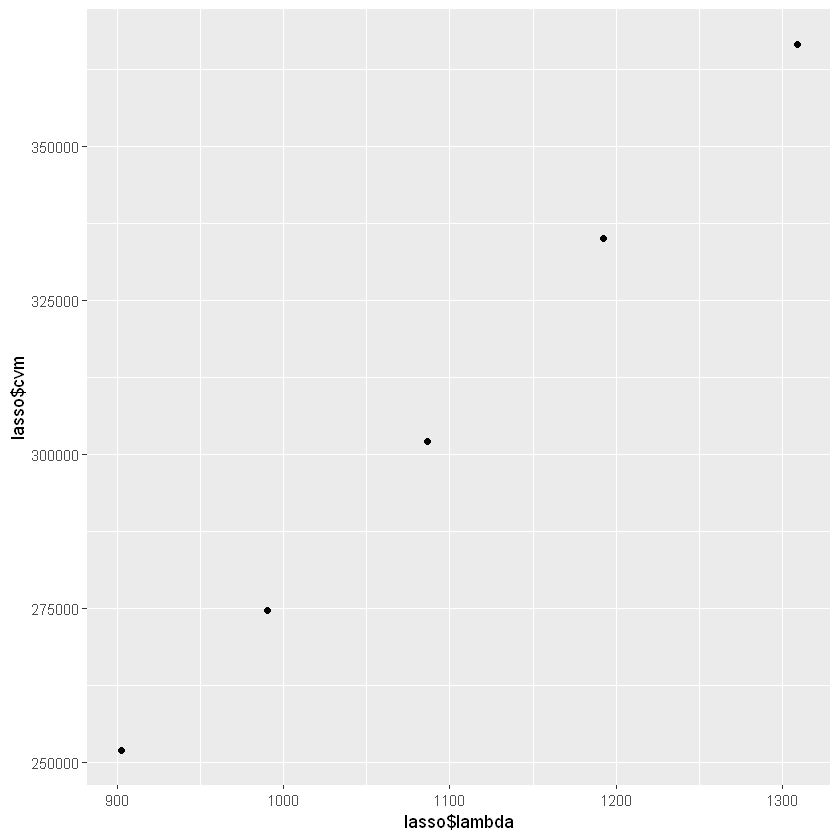

In [30]:
lasso = cv.glmnet(MatDesign, Hitters.train$Salary, nfolds = 5, alpha = 1, type.measure = "mse", intercept = F)
summary(lasso)

print(lasso$cvm)
ggplot(mapping = aes(x = lasso$lambda)) + geom_point(aes(y = lasso$cvm))

In [33]:
print(lasso$nzero)

s0 s1 s2 s3 s4 
 0  1  1  1  1 


Contrairement à l'estimateur ridge, le Lasso est capable d'annuler certains coefficients (i.e faire de la sélection de variables) pour garder un modèle plus simple.

In [34]:
index = which(lasso$lambda == lasso$lambda.min)
beta = lasso$glmnet.fit$beta[,index]
beta

AtBat       Hits      HmRun       Runs        RBI      Walks      Years 
 0.3586623  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
    CAtBat      CHits     CHmRun      CRuns       CRBI     CWalks    LeagueN 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
 DivisionW    PutOuts    Assists     Errors NewLeagueN 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000

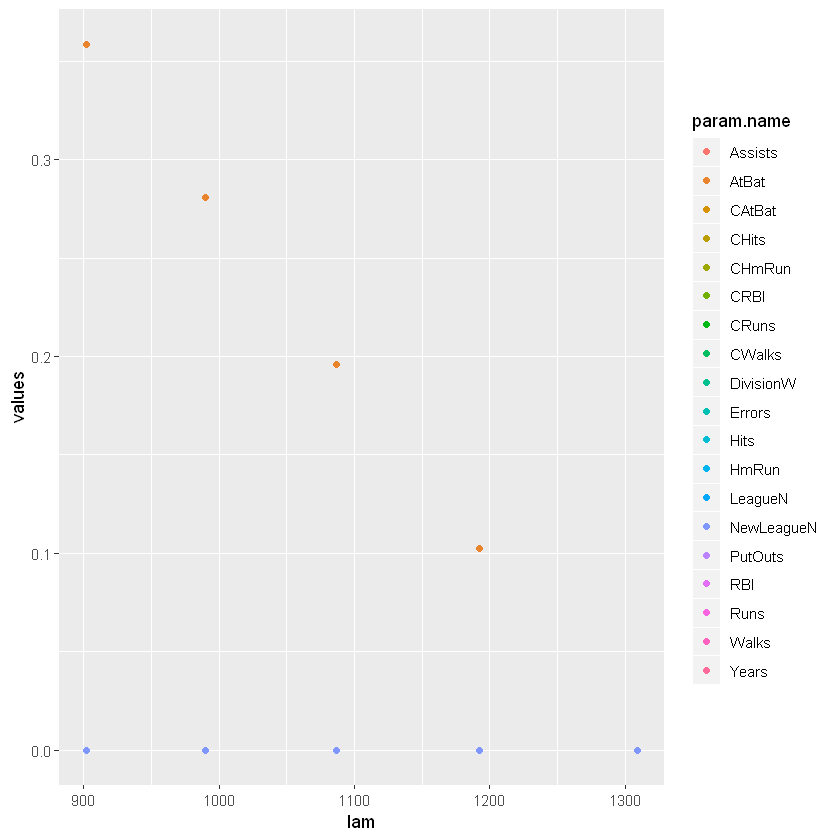

In [35]:
plot.trajectoire(lasso, colnames(MatDesign))

## Question 9
*Faire de même pour l’estimateur elastic-net.*

Pour faire de la validation croisée sur les deux paramètres de l'estimateur _elastic-net_, il faut appeler plusieurs fois `cv.glmnet` avec plusieurs valeurs de $\alpha$ mais en gardant le même découpage. En pratique, avec glmnet(), nous devons fixer la valeur de $\alpha$ et la fonction se charge de déterminer la plage de λ à explorer.

           Length Class  Mode     
lambda      7     -none- numeric  
cvm         7     -none- numeric  
cvsd        7     -none- numeric  
cvup        7     -none- numeric  
cvlo        7     -none- numeric  
nzero       7     -none- numeric  
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 369045.1 344838.7 319397.6 295979.1 274132.1 254395.4 237293.1


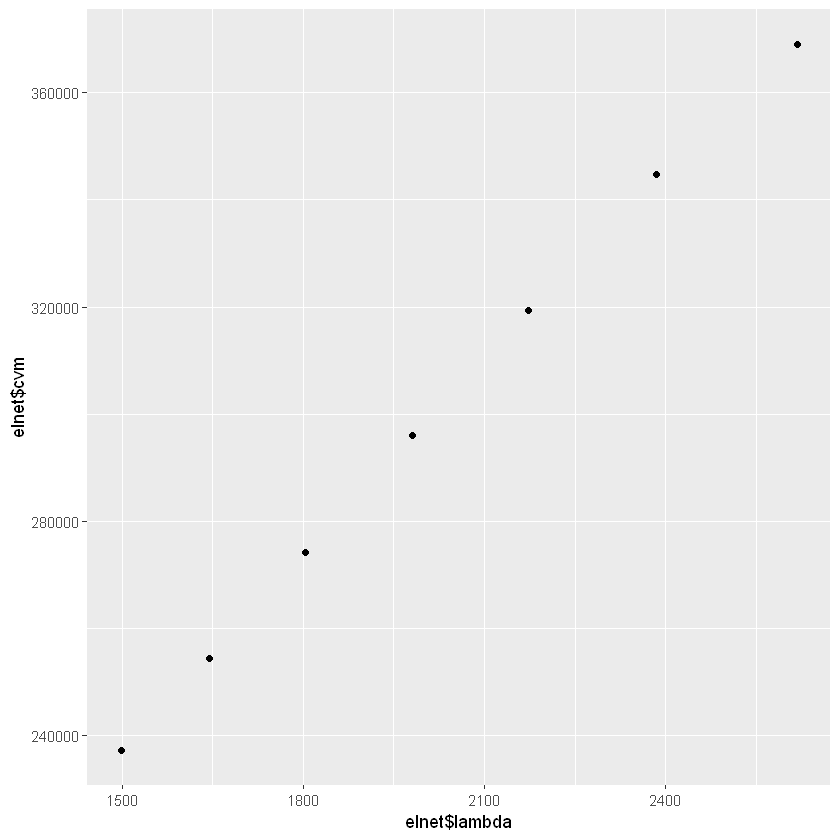

In [41]:
elnet = cv.glmnet(MatDesign, Hitters.train$Salary, nfolds = 5, alpha = 0.5, type.measure = "mse", intercept = F)
summary(elnet)

print(elnet$cvm)
ggplot(mapping = aes(x = elnet$lambda)) + geom_point(aes(y = elnet$cvm))

In [42]:
print(elnet$nzero)
index = which(elnet$lambda == elnet$lambda.min)
beta = elnet$glmnet.fit$beta[,index]
beta

s0 s1 s2 s3 s4 s5 s6 
 0  1  1  1  2  2  2 


AtBat       Hits      HmRun       Runs        RBI      Walks      Years 
 0.3224763  0.3221372  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
    CAtBat      CHits     CHmRun      CRuns       CRBI     CWalks    LeagueN 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
 DivisionW    PutOuts    Assists     Errors NewLeagueN 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000

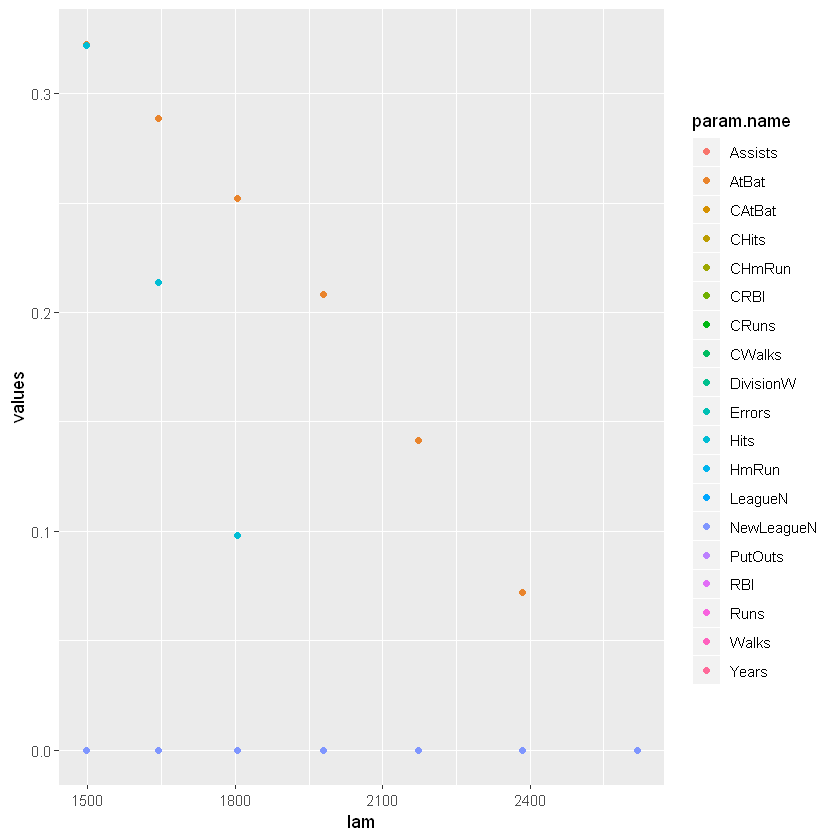

In [43]:
plot.trajectoire(elnet, colnames(MatDesign))

## Question 10
*Appliquer maintenant une méthode de type backward avec sélection AIC sur les données d’apprentissage pour choisir un modèle de régression linéaire basé des variables sélectionnées (par AIC).*

In [45]:
library(MASS)
Hitters.backwards = stepAIC(Hitters.lm,direction = "backward")
summary(Hitters.backwards)

Start:  AIC=1511.66
Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + 
    CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + League + 
    Division + PutOuts + Assists + Errors + NewLeague

            Df Sum of Sq      RSS    AIC
- Years      1        45  9912111 1509.7
- NewLeague  1      7187  9919253 1509.8
- CAtBat     1     11970  9924036 1509.8
- CHits      1     25954  9938020 1510.0
- League     1     76351  9988418 1510.7
- PutOuts    1    106379 10018445 1511.1
- Errors     1    112630 10024696 1511.1
- CHmRun     1    143522 10055588 1511.5
<none>                    9912066 1511.7
- AtBat      1    154936 10067002 1511.7
- Runs       1    218335 10130402 1512.5
- RBI        1    220161 10132227 1512.5
- HmRun      1    248861 10160928 1512.9
- CRuns      1    262030 10174096 1513.1
- Assists    1    330219 10242285 1514.0
- CRBI       1    362319 10274385 1514.4
- Division   1    401471 10313537 1514.9
- Hits       1    468197 10380263 1515.7
- CWalks     1    66


Step:  AIC=1500.26
Salary ~ AtBat + Hits + Runs + Walks + CRuns + CRBI + CWalks + 
    Division + Assists

           Df Sum of Sq      RSS    AIC
<none>                  10584096 1500.3
- Runs      1    204725 10788821 1500.8
- Assists   1    218032 10802128 1500.9
- AtBat     1    363369 10947465 1502.7
- Division  1    506503 11090599 1504.4
- Hits      1    596887 11180983 1505.4
- CRuns     1    605261 11189357 1505.5
- CRBI      1    647810 11231905 1506.0
- Walks     1    986453 11570549 1509.9
- CWalks    1   1126780 11710875 1511.5



Call:
lm(formula = Salary ~ AtBat + Hits + Runs + Walks + CRuns + CRBI + 
    CWalks + Division + Assists, data = Hitters.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-621.69 -145.45  -33.37  112.55 1874.86 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  202.6196    84.0137   2.412  0.01738 *  
AtBat         -1.6624     0.8156  -2.038  0.04371 *  
Hits           7.0996     2.7178   2.612  0.01013 *  
Runs          -4.7640     3.1140  -1.530  0.12866    
Walks          7.6025     2.2639   3.358  0.00105 ** 
CRuns          0.8263     0.3141   2.630  0.00963 ** 
CRBI           0.6349     0.2333   2.721  0.00746 ** 
CWalks        -1.2680     0.3533  -3.589  0.00048 ***
DivisionW   -125.6056    52.1978  -2.406  0.01763 *  
Assists        0.3258     0.2063   1.579  0.11699    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 295.8 on 121 degrees of freedom
Multiple R-squared:  0.4616,	Adjusted R-sq

## Question 11
*On souhaite comparer les erreurs RMSE des 5 modèles construits précédemment, en utilisant uniquement l’échantillon d’apprentissage pour le moment. On utilise pour cela la librairire caret. On donne le début du code pour deux des cinq modèles (lasso et régression linéaire sur toutes les variables).*

In [47]:
data_ctrl = trainControl(method = "repeatedcv", number = 5, repeats = 10)
lam_seq = seq(0.1, 30, by = 0.1)
alpha_seq = seq(0, 1, by = 0.1)

Hitters.lm.caret <- train(Salary ~ .,
    data = Hitters.train,
    trControl = data_ctrl,
    method = "lm")

Hitters.lasso.caret <- train(Salary ~ .,
    data = Hitters.train,
    trControl = data_ctrl,
    method = "glmnet",
    tuneGrid = expand.grid(alpha = 1, lambda = lam_seq))

Hitters.ridge.caret <- train(Salary ~ .,
    data = Hitters.train,
    trControl = data_ctrl,
    method = "glmnet",
    tuneGrid = expand.grid(alpha = 0, lambda = lam_seq))

Hitters.elnet.caret <- train(Salary ~ .,
    data = Hitters.train,
    trControl = data_ctrl,
    method = "glmnet",
    tuneGrid = expand.grid(alpha = alpha_seq, lambda = lam_seq))

Hitters.steplm.caret <- train(Salary ~ .,
    data = Hitters.train,
    trControl = data_ctrl,
    method = "glmStepAIC")

models = list(
    lm = Hitters.lm.caret,
    lasso = Hitters.lasso.caret,
    ridge = Hitters.ridge.caret,
    elnet = Hitters.elnet.caret,
    steplm = Hitters.steplm.caret
)
results = resamples(models)

Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
"impossible d'ouvrir le fichier compressé 'C:/Users/acer/Documents/R/win-library/3.5/glmnet/DESCRIPTION', cause probable : 'No such file or directory'"

1 package is needed for this model and is not installed. (glmnet). Would you like to try to install it now?

ERROR: Error: Required package is missing



Call:
summary.resamples(object = results)

Models: lm, lasso, ridge, elnet, steplm 
Number of resamples: 5 

MAE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
lm     223.4047 246.7809 247.1477 248.3901 248.4478 276.1696    0
lasso  227.1154 234.9962 235.1181 246.9455 256.9611 280.5367    0
ridge  181.2195 241.7605 252.7484 239.1802 253.5013 266.6716    0
elnet  184.2406 224.2496 246.4657 239.9028 257.0805 287.4775    0
steplm 202.3170 250.4809 256.3723 263.2527 299.6330 307.4604    0

RMSE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
lm     314.1756 333.8150 368.8052 363.9757 369.7174 433.3656    0
lasso  273.3750 349.0028 369.6570 355.0086 387.4266 395.5816    0
ridge  303.9164 358.7292 362.6434 355.5723 363.7838 388.7887    0
elnet  313.1787 335.9489 338.1746 350.4152 346.5014 418.2725    0
steplm 321.2315 352.1151 364.7174 367.9265 376.6424 424.9259    0

Rsquared 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lm 

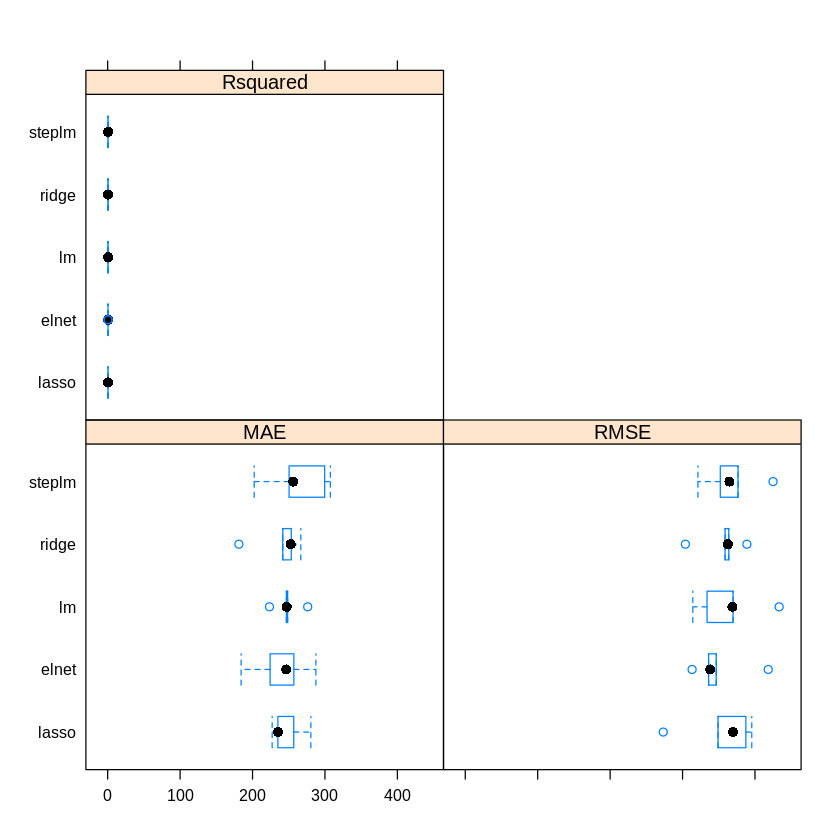

In [222]:
summary(results)
bwplot(results)

In [288]:
rmse = function(data, fit) {
    mat = model.matrix(Salary ~ ., data)[,-1]
    is.glmnet = sum(class(fit) == "glmnet")
    a = data$Salary
    p = if (is.glmnet) {
        lambda = fit$lambdaOpt
        predict(fit, mat, s = c(lambda))[,1]
    } else {
        predict(fit, data.frame(mat))
    }
    sqrt(sum((p - a)^2))
}

final = purrr::reduce(models, function(matrix, model) {
    rbind(matrix, c(
        rmse(Hitters.train, model$finalModel),
        rmse(Hitters.test, model$finalModel)
    ))
}, .init = c())

colnames(final) = c("RMSE.train", "RMSE.test")
rownames(final) = results$models

final

,RMSE.train,RMSE.test
lm,3186.787,4067.064
lasso,3571.878,3879.266
ridge,3379.073,3871.920
elnet,3556.905,3893.797
steplm,3250.651,3921.155
